# Main

In [2]:
%load_ext autoreload
%autoreload 2
import sys

In [3]:
sys.path.append('..')

In [4]:
import pandas as pd
from equipfailpred.train import build_model
training_data_df = pd.read_csv('../data/maintenance.csv')
model_performance_dict = build_model(training_data_df)
print(model_performance_dict)

{'Accuracy': 0.985, 'Precision': 0.8604651162790697, 'Recall': 0.6065573770491803, 'Auc': 0.8017314992517691}


In [5]:
# import pandas as pd

# # Read the original CSV file into a DataFrame
# df = pd.read_csv('../data/maintenance-copy.csv')

# # Drop the desired column
# column_to_drop = 'column_name'  # Replace 'column_name' with the name of the column you want to drop
# modified_df = df.drop(columns=['UDI', 'Target', 'Failure Type'])

# # Save the modified DataFrame to a new CSV file
# modified_df.to_csv('modified.csv', index=False)  # Set index=False to exclude row indices in the CSV file


In [6]:
training_data_df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [7]:
import pandas as pd
from equipfailpred.inference import make_predictions, selective_predict


user_data_df = pd.read_csv('../data/maintenance.csv')
predictions = make_predictions(user_data_df)
predictions



array([0, 0, 0, ..., 0, 0, 0])

In [8]:
import numpy as np
import matplotlib.pyplot as plt


data = predictions
def plot_targe_count(data):
    unique, counts = np.unique(data, return_counts=True)
    if len(unique) > 1:
        bars = plt.bar(unique, counts, color=['green', 'red'])
        plt.xlabel('Failure Status')
        plt.ylabel('Count')
        plt.title('Distribution of Failures')
        plt.xticks(unique, ['Not Failure', 'Failure'])
        for bar, count in zip(bars, counts):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                    ha='center', va='bottom', color='black')
        plt.show()
    else:
        print("No failures detected")

In [9]:
X = ['Air temperature [K]', 
             'Process temperature [K]', 
             'Rotational speed [rpm]', 
             'Torque [Nm]', 
             'Tool wear [min]',
             'Type']

In [10]:
pred = selective_predict(X,user_data_df)
pred

array([0, 0, 0, ..., 0, 0, 0])

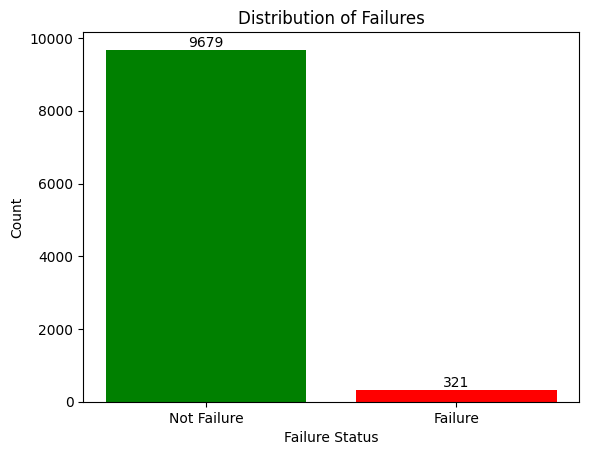

In [11]:
plot_targe_count(pred)

In [12]:
sample_df = user_data_df[X].sample(n=6,random_state=42)
sample_label = user_data_df['Target'].sample(n=6,random_state=42)

In [13]:
sample_label

6252    0
4684    1
1731    0
4742    0
4521    0
6340    1
Name: Target, dtype: int64

In [14]:
sample_df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
6252,300.8,310.3,1538,36.1,198,L
4684,303.6,311.8,1421,44.8,101,M
1731,298.3,307.9,1485,42.0,117,M
4742,303.3,311.3,1592,33.7,14,L
4521,302.4,310.4,1865,23.9,129,L
6340,300.5,309.9,1397,45.9,210,H


In [15]:
s_pred = selective_predict(X,sample_df)
s_pred

array([0, 0, 0, 0, 0, 0])

In [16]:
plot_targe_count(s_pred)

No failures detected


298.1,308.6,1551,42.8,0,M

In [17]:
new_row_values = [298.1,308.6,6551,422.8,0,'M']
# df = sample_df.append(pd.Series(new_row_values, index=sample_df.columns), ignore_index=True)
sample_df.loc[len(sample_df)] = new_row_values
sample_df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
6252,300.8,310.3,1538,36.1,198,L
4684,303.6,311.8,1421,44.8,101,M
1731,298.3,307.9,1485,42.0,117,M
4742,303.3,311.3,1592,33.7,14,L
4521,302.4,310.4,1865,23.9,129,L
6340,300.5,309.9,1397,45.9,210,H
6,298.1,308.6,6551,422.8,0,M


In [18]:
pres=make_predictions(sample_df)
pres

array([0, 0, 0, 0, 0, 0, 1])

In [19]:
suma=sample_df

In [20]:
suma['predictions'] = pres

In [21]:
suma

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type,predictions
6252,300.8,310.3,1538,36.1,198,L,0
4684,303.6,311.8,1421,44.8,101,M,0
1731,298.3,307.9,1485,42.0,117,M,0
4742,303.3,311.3,1592,33.7,14,L,0
4521,302.4,310.4,1865,23.9,129,L,0
6340,300.5,309.9,1397,45.9,210,H,0
6,298.1,308.6,6551,422.8,0,M,1


In [22]:
dnf = pd.DataFrame(new_row_values)
dnf

,0
0,298.1
1,308.6
2,6551
3,422.8
4,0
5,M


In [23]:

# Define the row values
new_row_values = [298.1, 308.6, 7551, 422.8, 0, 'M']

# Define the column names
column_names = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type']

# Create a DataFrame with a single row
df = pd.DataFrame([new_row_values], columns=column_names)

In [24]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
0,298.1,308.6,7551,422.8,0,M


In [25]:
# Define the row values
new_row_values = [298.1, 308.6, 9551, 622.8, 0, 'M']

# Define the column names
column_names = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type']

# Create a DataFrame with a single row
df = pd.DataFrame([new_row_values], columns=column_names)

In [26]:
len(df)

1

In [27]:
dfp=make_predictions(df)

In [28]:
dfp

array([1])

In [53]:
from datetime import datetime
dt = datetime.now().date().strftime('%Y-%m-%d')

In [54]:
dt

'2024-04-02'

In [49]:
type(dt)

str

<function datetime.date>

In [31]:
from sqlalchemy import func
datm = func.now()

In [32]:
datm

<sqlalchemy.sql.functions.now at 0x784e6614cdc0; now>

In [33]:
print(datm)

now()


In [55]:
def list_to_str(lst):
    """
    Converts a list to a string representation.
    
    Args:
    lst (list): The list to convert.
    
    Returns:
    str: A string representation of the list.
    """
    return ', '.join(map(str, lst))

In [56]:
my_list = [1, 2, 3, 4, 5]
result = list_to_str(my_list)
print(result)  # Output: "1, 2, 3, 4, 5"

1, 2, 3, 4, 5


In [57]:
print(type(result))

<class 'str'>


In [59]:
nere = ', '.join(map(str, my_list))

In [61]:
print(type(nere))

<class 'str'>
